# Hotel Reservation Project

## Introduction

The Hotel Reservation Project is aimed at exploring and analyzing a dataset obtained from Kaggle related to hotel reservations. The dataset contains valuable information about hotel bookings, including various features such as customer details, booking history, and reservation status. The main objective of this project is to predict whether a customer will honor the reservation or cancel it. This prediction can be valuable for hotels to manage their bookings more efficiently and reduce revenue loss due to cancellations.

## Executive Summary

Online hotel reservation channels have revolutionized the booking process, but they have also brought about challenges such as booking cancellations and no-shows. This project focuses on predicting whether a hotel reservation will be honored or canceled. The dataset's target variable is booking_status, which has two categories: "Not_Canceled" and "Canceled." The dataset includes various features such as the number of adults and children, lead time, room type, and more. Initial exploration shows that "Canceled" reservations account for a significant portion of the dataset.

## Data Description

   **no_of_adults:** The number of adults in the reservation (categorical: 5 values)

   **no_of_children:** The number of children in the reservation (categorical: 6 values)
   
   **no_of_weekend_nights:** The number of weekend nights included in the reservation (categorical: 8 values)
   
   **no_of_week_nights:** The number of weeknights included in the reservation (categorical: 18 values)
   
   **type_of_meal_plan:** The type of meal plan chosen (categorical: 4 values)
   
   **required_car_parking_space:** Whether a car parking space is required (binary: 2 values)
   
   **room_type_reserved:** The type of room reserved (categorical: 7 values)
   
   **lead_time:** The number of days between booking and arrival (numerical: range up to 352 days)
   
   **arrival_year:** The year of arrival (categorical: 2 values)
   
   **arrival_month:** The month of arrival (categorical: 12 values)
   
   **arrival_date:** The day of arrival (categorical: 31 values)
   
   **market_segment_type:** The type of market segment (categorical: 5 values)
   
   **repeated_guest:** Whether the guest is a repeated customer (binary: 2 values)
   
   **no_of_previous_cancellations:** The number of previous cancellations by the guest (categorical: 9 values)
   
   **no_of_previous_bookings_not_canceled:** The number of previous bookings not canceled by the guest (numerical: range up to                                                59)
   **avg_price_per_room:** The average price per room (numerical: range up to 3930)
   
   **no_of_special_requests:** The number of special requests made by the guest (categorical: 6 values)
   
   **booking_status:** The target variable, indicating whether the reservation was canceled or not (binary: 2 values)
   
This project will involve thorough data exploration, preprocessing, feature engineering, model building, evaluation, and drawing meaningful insights from the dataset to answer the key question of predicting booking status.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
original_df = pd.read_csv('/kaggle/input/data-set/Hotel Reservations.csv')

In [4]:
def categorical_data(data):
    # Identify columns with object data type
    cat_columns = data.select_dtypes(['object']).columns
    
    for col in cat_columns:
        # Remove white spaces, lower
        data[col] = data[col].str.strip()
        data[col] = data[col].str.lower()
        
        # Replace all special characters except alphanumerics, spaces, and dashes
        data[col] = data[col].str.replace('[^a-zA-Z0-9\s-]', '', regex=True)
        
    return data

In [5]:
original_df.drop('Booking_ID', axis = 1, inplace = True)

In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [7]:
original_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
df = categorical_data(original_df)

In [9]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,meal plan 1,0,roomtype 1,224,2017,10,2,offline,0,0,0,65.00,0,notcanceled
1,2,0,2,3,not selected,0,roomtype 1,5,2018,11,6,online,0,0,0,106.68,1,notcanceled
2,1,0,2,1,meal plan 1,0,roomtype 1,1,2018,2,28,online,0,0,0,60.00,0,canceled
3,2,0,0,2,meal plan 1,0,roomtype 1,211,2018,5,20,online,0,0,0,100.00,0,canceled
4,2,0,1,1,not selected,0,roomtype 1,48,2018,4,11,online,0,0,0,94.50,0,canceled


In [10]:
print("Uniqueness of the features")
print("=" * 44)
df.nunique()

Uniqueness of the features


no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

## EDA (Exploratory Data Analysis)

Exploring the Impact of Guest Choices on Booking Outcomes

In this exploratory data analysis project, we will delve into a dataset related to hotel reservations, with a primary focus on understanding the relationships between key factors and booking outcomes. The following columns will be central to our analysis:

**Type of Meal Plan:** We will investigate how the choice of meal plan, selected by guests, is associated with booking status (whether a reservation was canceled or not).

**Room Type Reserved:** We will examine how the selection of room types, such as "Single," "Double," or "Suite," influences booking outcomes.

**Market Segment Type:** We will explore how different market segments, including "Online Travel Agents," "Corporate," "Direct," and others, impact booking status.

Utilizing the booking_status as the hue, we will create count-based visualizations to better understand the distribution of meal plan choices, room types, and market segments with a particular focus on cancellation rates.

In [11]:
# Create the DataFrame description
print('Description of the Categorical Dataset:')
print("=" * 40)
categorical_description = df.describe(include=['object', 'bool']).T

# Define a styling function
def style_description(s):
    return f'background-color: lightblue; font-weight: bold;'

# Apply the styling to the DataFrame
styled_description = categorical_description.style.applymap(style_description)
styled_description

Description of the Categorical Dataset:


/tmp/ipykernel_33/3442448102.py:11: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_description = categorical_description.style.applymap(style_description)


,count,unique,top,freq
type_of_meal_plan,36275,4,meal plan 1,27835
room_type_reserved,36275,7,roomtype 1,28130
market_segment_type,36275,5,online,23214
booking_status,36275,2,notcanceled,24390


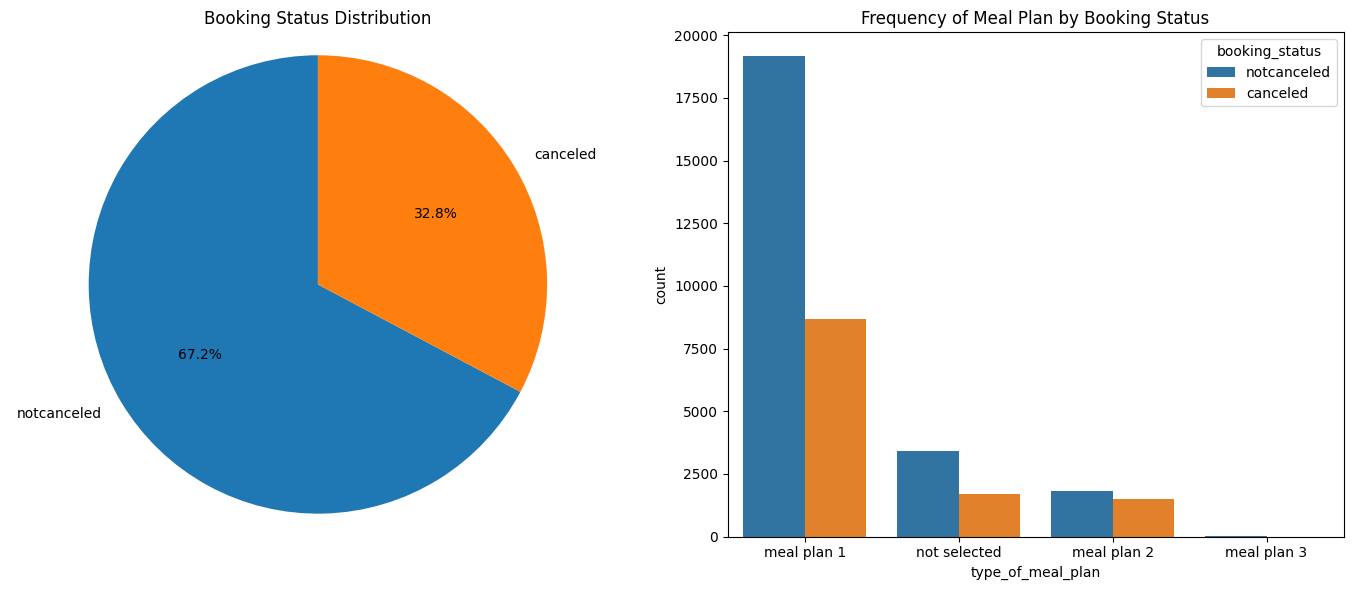

In [12]:
# Create subplots in a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Booking Status Distribution (Pie Chart)
booking_status_counts = df['booking_status'].value_counts()
labels = booking_status_counts.index
sizes = booking_status_counts.values

axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Booking Status Distribution')
axes[0].axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

# Plot 2: Frequency of Meal Plan by Booking Status (Countplot)
sns.countplot(data=df, x="type_of_meal_plan", hue="booking_status", ax=axes[1])
axes[1].set_title('Frequency of Meal Plan by Booking Status')

# Display the plots in a tight layout
plt.tight_layout()
plt.show()

In [13]:
# Create a new DataFrame with only "notcanceled" entries
notcanceled_df = df[df["booking_status"] == "notcanceled"]

# Create a new DataFrame with only "canceled" entries
canceled_df = df[df["booking_status"] == "canceled"]

# Group by "market_segment_type" and calculate some aggregate statistic (e.g., count)
notcanceled_grouped = notcanceled_df.groupby("market_segment_type").count()

canceled_grouped = canceled_df.groupby("market_segment_type").count()

# Combine the two DataFrames
result_df = pd.DataFrame({
    "notcanceled_count": notcanceled_grouped["booking_status"],
    "canceled_count": canceled_grouped["booking_status"]
}).fillna(0)  # Fill NaN values with 0 if there are no entries for a particular market_segment_type

# Convert "canceled_count" column to integers
result_df["canceled_count"] = result_df["canceled_count"].astype(int)

# Apply styling to the DataFrame
styled_df = result_df.style.applymap(style_description)

/tmp/ipykernel_33/1707201513.py:22: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = result_df.style.applymap(style_description)


In [14]:
print('Market segment by Booking status:')
print("=" * 40)
styled_df

Market segment by Booking status:


,notcanceled_count,canceled_count
market_segment_type,,
aviation,88,37
complementary,391,0
corporate,1797,220
offline,7375,3153
online,14739,8475


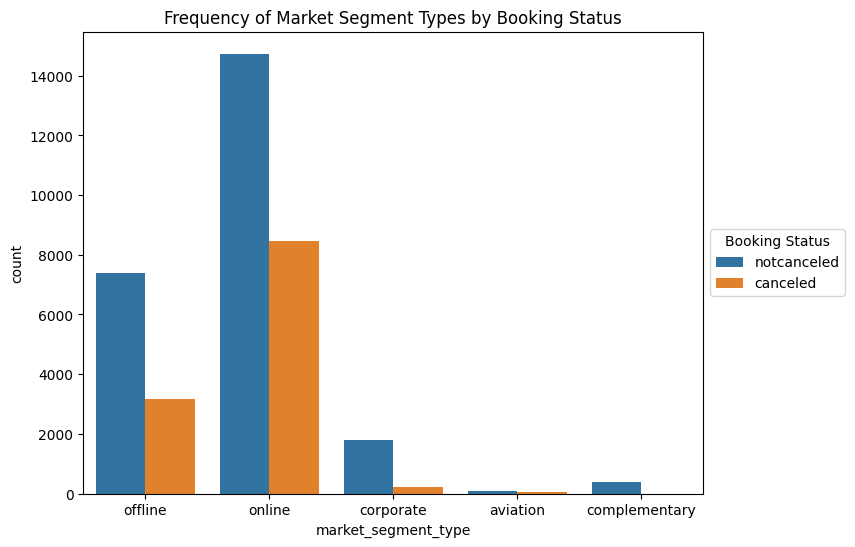

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="market_segment_type", hue="booking_status")
plt.title('Frequency of Market Segment Types by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

## Room Type Analysis

In our dataset, Room Types 1 and 4, the most popular choices, display distinctive lead time patterns:

### Room Type 1:

**Mean Lead Time:** 89.6 days

**Median Lead Time:** 59 days

**Std Dev:** 90.8 days

Room Type 1 is highly sought after, with a mean lead time of 89.6 days, indicating a preference for early bookings. The median lead time of 59 days suggests a central tendency, but the substantial standard deviation of 90.8 days reflects diverse planning preferences among guests.

### Room Type 4:

**Mean Lead Time:** 69.5 days

**Median Lead Time:** 55 days

**Std Dev:** 59.7 days

Room Type 4, also popular, has a slightly shorter mean lead time of 69.5 days, balancing early and more immediate bookings. With a standard deviation of 59.7 days, it exhibits a more consistent pattern in booking behavior compared to Room Type 1.

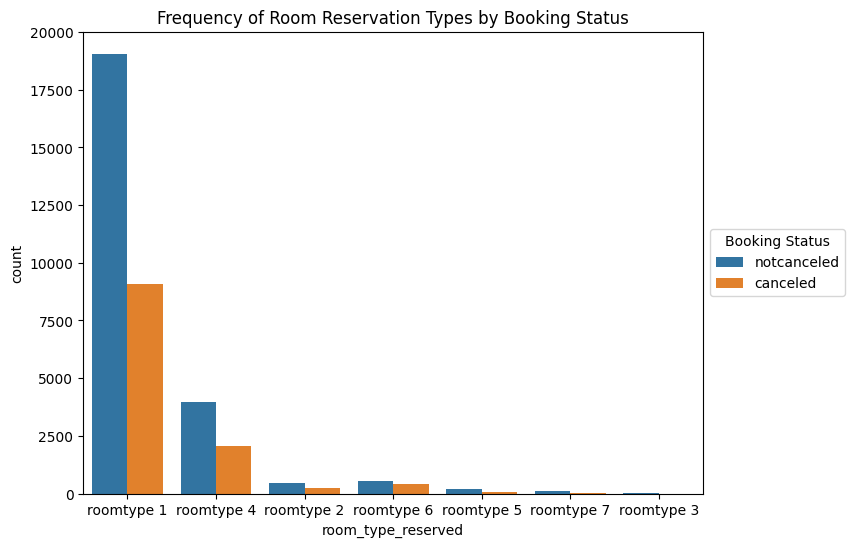

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="room_type_reserved", hue="booking_status")
plt.title('Frequency of Room Reservation Types by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

## Understanding Guest Dynamics

The following columns related to people will be at the center of our analysis:

**Number of Adults:** We will explore how the number of adults in a reservation party affects booking status (cancellation or non-cancellation), average room prices, and the lead time between booking and arrival.

**Repeated Guest:** Our analysis will center on whether guests being repeat customers (yes or no) have any influence on booking outcomes, average room prices, and lead times.

**Number of Children:** We will examine how the number of children included in a reservation party is associated with booking status, average room prices, and lead times.

**Required Car Parking Space:** This column will be studied to understand how the need for a car parking space (yes or no) in a reservation is related to booking status, average room prices, and lead times.

Our primary objectives in this project are to uncover insights into guest behavior, preferences, and requirements during the hotel booking process.

In [17]:
print('Description of the Numeric Dataset:')
numeric_data = df.describe(include=['int64', 'float64']).T

print("=" * 40)
# Apply the styling to the DataFrame
styled_description = numeric_data.style.applymap(style_description)
styled_description

Description of the Numeric Dataset:


/tmp/ipykernel_33/1680448307.py:6: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_description = numeric_data.style.applymap(style_description)


,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.000000,1.844962,0.518715,0.000000,2.000000,2.000000,2.000000,4.000000
no_of_children,36275.000000,0.105279,0.402648,0.000000,0.000000,0.000000,0.000000,10.000000
no_of_weekend_nights,36275.000000,0.810724,0.870644,0.000000,0.000000,1.000000,2.000000,7.000000
no_of_week_nights,36275.000000,2.204300,1.410905,0.000000,1.000000,2.000000,3.000000,17.000000
required_car_parking_space,36275.000000,0.030986,0.173281,0.000000,0.000000,0.000000,0.000000,1.000000
lead_time,36275.000000,85.232557,85.930817,0.000000,17.000000,57.000000,126.000000,443.000000
arrival_year,36275.000000,2017.820427,0.383836,2017.000000,2018.000000,2018.000000,2018.000000,2018.000000
arrival_month,36275.000000,7.423653,3.069894,1.000000,5.000000,8.000000,10.000000,12.000000
arrival_date,36275.000000,15.596995,8.740447,1.000000,8.000000,16.000000,23.000000,31.000000
repeated_guest,36275.000000,0.025637,0.158053,0.000000,0.000000,0.000000,0.000000,1.000000


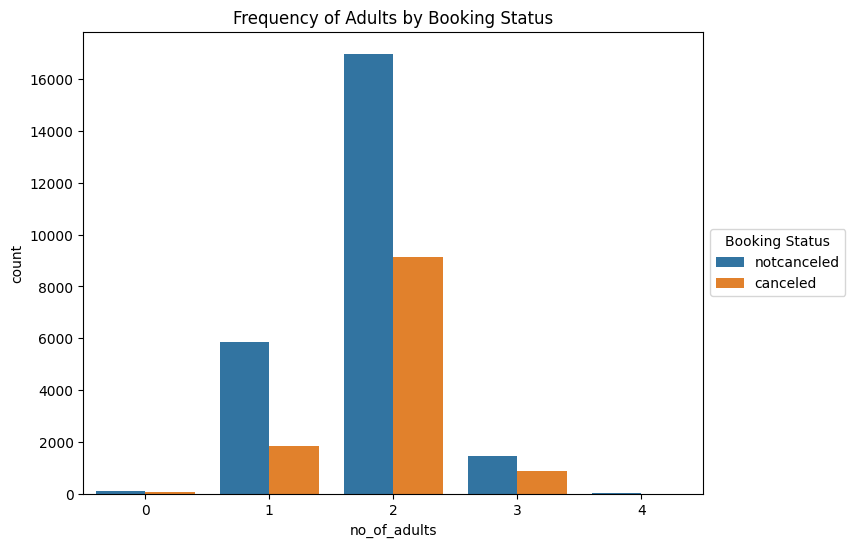

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="no_of_adults", hue="booking_status")
plt.title('Frequency of Adults by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

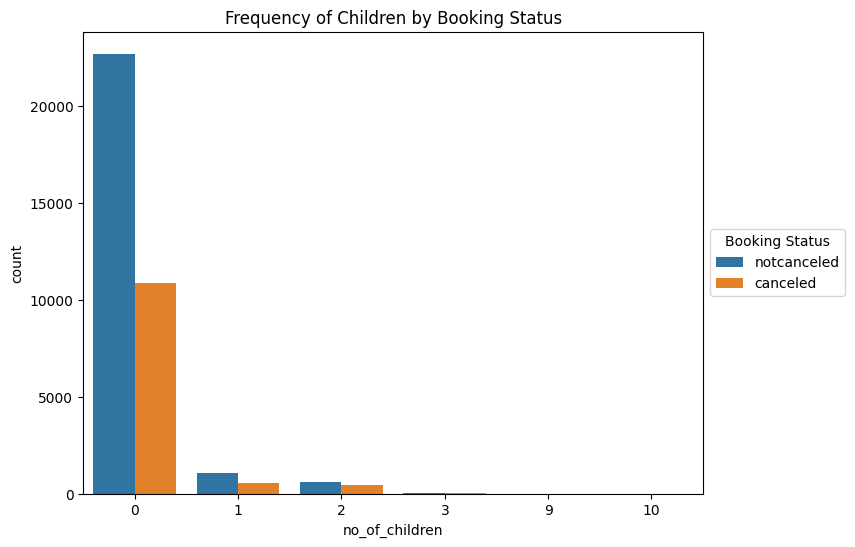

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="no_of_children", hue="booking_status")
plt.title('Frequency of Children by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

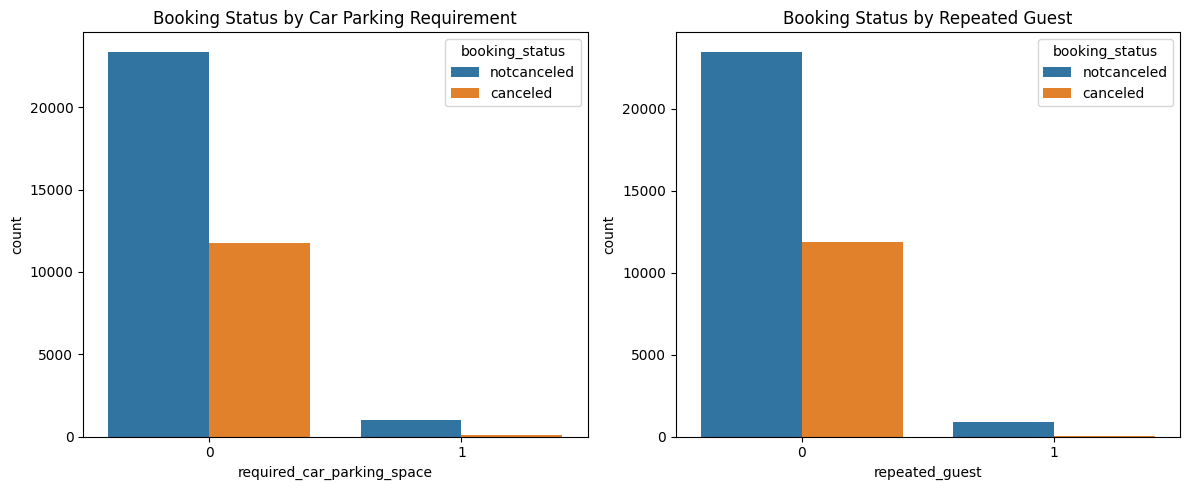

In [20]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: x="required_car_parking_space", hue="booking_status"
sns.countplot(data=df, x="required_car_parking_space", hue="booking_status", ax=axes[0])
axes[0].set_title("Booking Status by Car Parking Requirement")

# Plot 2: x="repeated_guest", hue="booking_status"
sns.countplot(data=df, x="repeated_guest", hue="booking_status", ax=axes[1])
axes[1].set_title("Booking Status by Repeated Guest")

# Display the plots
plt.tight_layout()
plt.show()

## Key Columns Overview

Before delving into customer behavior analysis, let's quickly survey the unique values within key columns:

**Previous Cancellations:** 9 unique values, showcasing varied levels of prior booking cancellations.

**Previous Bookings (Not Canceled):** 59 unique values, highlighting the diversity of successfully completed bookings.

**Special Requests:** 6 unique values, capturing different types of requests made by guests.

**Booking Status:** Our focal point, a binary column indicating reservation cancellation status.

Understanding these column nuances sets the stage for our exploration of customer patterns and their impact on booking outcomes.

#### Stay Duration Insights

Beyond customer behavior, considering the stay duration provides valuable insights:

**Weeknight Stays:** 8 unique values, depicting diverse durations for guests staying during the week.

**Weekend Stays:** 8 unique values, reflecting varied patterns in weekend stay durations.

This foundational knowledge guides our analysis of customer patterns and their implications for stay duration and booking outcomes.

In [21]:
# Create the DataFrame
prev_df = df['no_of_previous_cancellations'].value_counts().reset_index()

# Rename the columns for clarity
prev_df.columns = ['No. of Previous Cancellations', 'Count']
prev_df = prev_df.sort_values(by='No. of Previous Cancellations')

# Style the DataFrame with a blue background for better visibility
styled_prev_df = prev_df.style.set_properties(subset=['Count'], **{'background-color': 'lightblue'})
styled_prev_df

,No. of Previous Cancellations,Count
0,0,35937
1,1,198
2,2,46
3,3,43
6,4,10
5,5,11
8,6,1
4,11,25
7,13,4


In [22]:
#Get the value counts
value_counts = df['no_of_previous_bookings_not_canceled'].value_counts()

# Define custom bin edges
bin_edges = [0, 1, 5, 10, 20, 30, 50, max(value_counts.index)]
binned_values = pd.cut(value_counts.index, bin_edges, right=False)
grouped_counts = value_counts.groupby(binned_values).sum()

# Reset the index for the result DataFrame
grouped_counts = grouped_counts.reset_index()
grouped_counts.columns = ['No. of Previous Bookings Not Canceled Range', 'Count']

# Style the DataFrame with a background color for the 'Count' column
styled_grouped_counts = grouped_counts.style.applymap(lambda x: 'background-color: lightblue', subset=['Count'])
styled_grouped_counts

/tmp/ipykernel_33/304441150.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = value_counts.groupby(binned_values).sum()
/tmp/ipykernel_33/304441150.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_grouped_counts = grouped_counts.style.applymap(lambda x: 'background-color: lightblue', subset=['Count'])


,No. of Previous Bookings Not Canceled Range,Count
0,"[0, 1)",35463
1,"[1, 5)",485
2,"[5, 10)",162
3,"[10, 20)",95
4,"[20, 30)",36
5,"[30, 50)",25
6,"[50, 58)",8


In [23]:
# Create a new DataFrame with only "notcanceled" entries
notcanceled_df = df[df["booking_status"] == "notcanceled"]

# Create a new DataFrame with only "canceled" entries
canceled_df = df[df["booking_status"] == "canceled"]

# Group by "market_segment_type" and calculate some aggregate statistic (e.g., count)
notcanceled_grouped = notcanceled_df.groupby("no_of_special_requests").count()

canceled_grouped = canceled_df.groupby("no_of_special_requests").count()

# Combine the two DataFrames
result_df = pd.DataFrame({
    "notcanceled_count": notcanceled_grouped["booking_status"],
    "canceled_count": canceled_grouped["booking_status"]
}).fillna(0)  # Fill NaN values with 0 if there are no entries for a particular market_segment_type

# Convert "canceled_count" column to integers
result_df["canceled_count"] = result_df["canceled_count"].astype(int)
# Apply styling to the DataFrame
styled_df = result_df.style.applymap(style_description)

/tmp/ipykernel_33/1567535166.py:21: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = result_df.style.applymap(style_description)


In [24]:
styled_df

,notcanceled_count,canceled_count
no_of_special_requests,,
0,11232,8545
1,8670,2703
2,3727,637
3,675,0
4,78,0
5,8,0


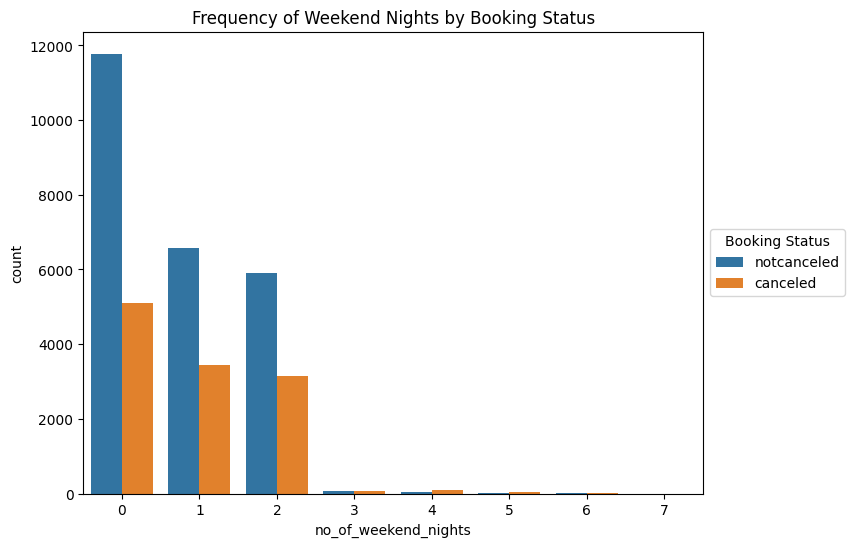

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="no_of_weekend_nights", hue="booking_status")
plt.title('Frequency of Weekend Nights by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

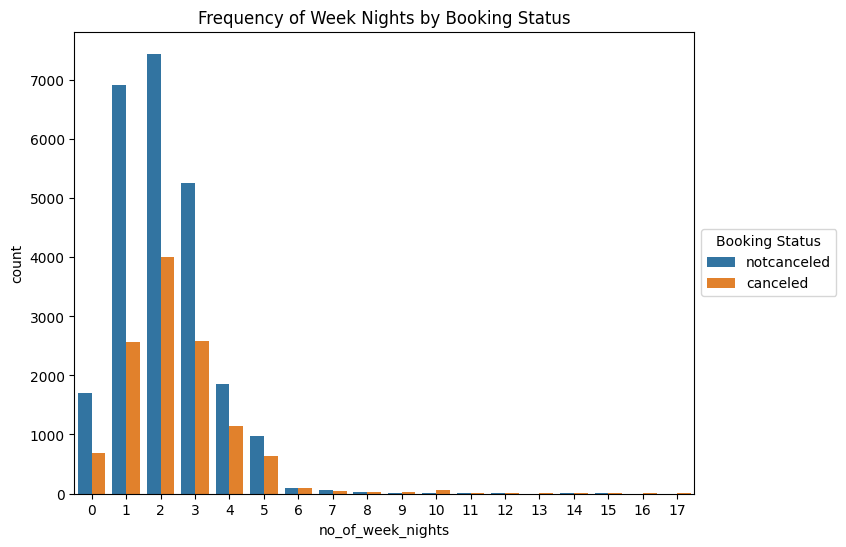

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="no_of_week_nights", hue="booking_status")
plt.title('Frequency of Week Nights by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

## Analyzing Booking Data: Lead Time and Room Prices

In this section, we will explore two crucial aspects of our dataset, employing the IQR (Interquartile Range) method to identify and address potential anomalies:

**Lead Time:** Examining the frequency distribution will provide insights into the advance planning habits of guests. Additionally, a box plot will visually represent the lead time distribution, allowing us to spot any potential anomalies flagged by the IQR method.

**Average Room Prices:** Analyzing the frequency distribution of room prices will reveal patterns in pricing. Using a box plot, we will visualize the room price distribution and detect potential anomalies through the IQR method.

This approach, incorporating the IQR method, enhances our understanding of hotel booking dynamics and customer preferences by highlighting noteworthy patterns and potential outliers in lead time and room prices.

In [27]:
df["lead_time"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
lead_time,0.0,85.232557,57.0,443.0,85.930817,1.292492


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


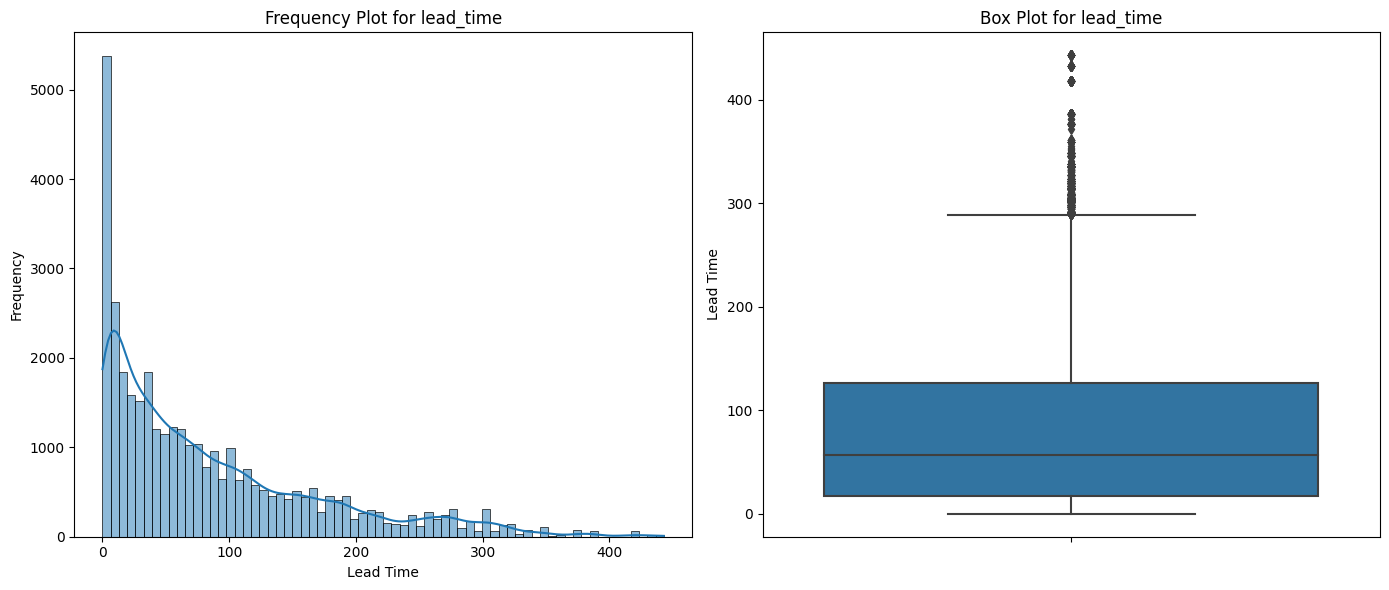

In [28]:
# Set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Frequency plot (histogram) for lead_time
sns.histplot(data=df, x='lead_time', kde=True, ax=ax1)
ax1.set_title('Frequency Plot for lead_time')
ax1.set_xlabel('Lead Time')
ax1.set_ylabel('Frequency')

# Box plot for lead_time
sns.boxplot(data=df, y='lead_time', ax=ax2)
ax2.set_title('Box Plot for lead_time')
ax2.set_ylabel('Lead Time')

plt.tight_layout()
plt.show()


In [29]:
df["avg_price_per_room"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
avg_price_per_room,0.0,103.423539,99.45,540.0,35.089424,0.667133


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


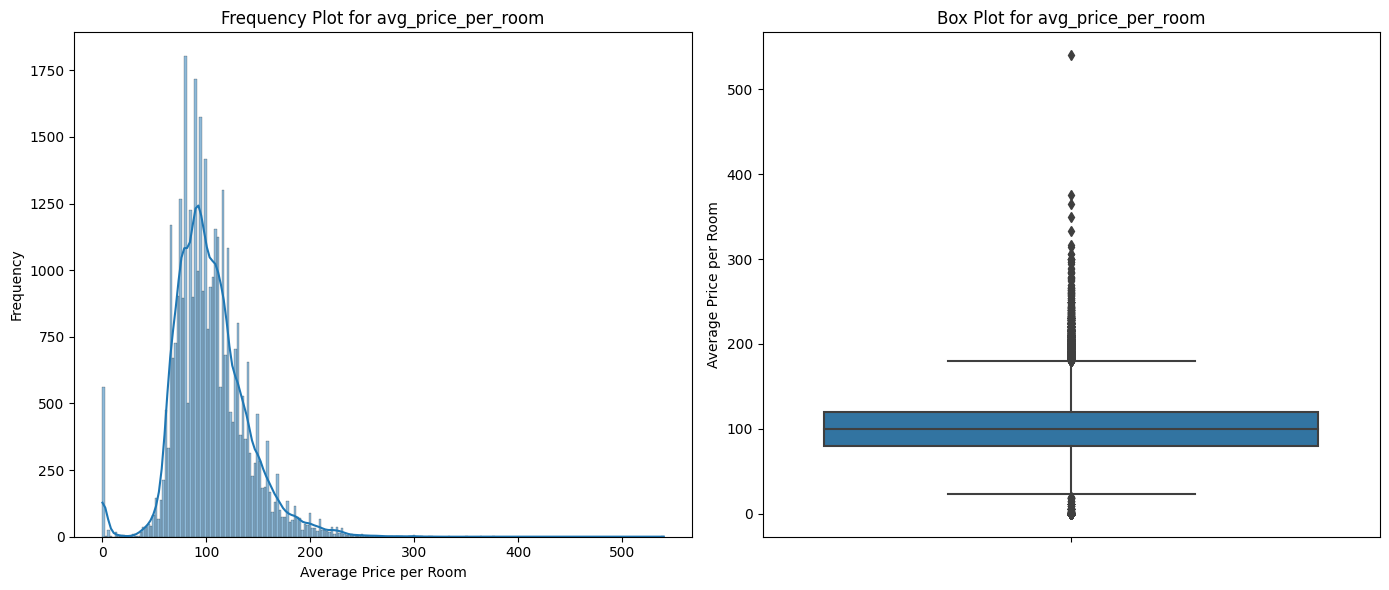

In [30]:
# Set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Frequency plot (histogram) for avg_price_per_room
sns.histplot(data=df, x='avg_price_per_room', kde=True, ax=ax1)
ax1.set_title('Frequency Plot for avg_price_per_room')
ax1.set_xlabel('Average Price per Room')
ax1.set_ylabel('Frequency')

# Box plot for avg_price_per_room
sns.boxplot(data=df, y='avg_price_per_room', ax=ax2)
ax2.set_title('Box Plot for avg_price_per_room')
ax2.set_ylabel('Average Price per Room')

plt.tight_layout()
plt.show()

## Statistical Tests and Feature Relationships

In this section, we leverage statistical tests to explore the associations between each feature and the target variable, 'booking_status.' The Chi-squared test, well-suited for categorical features, is a key tool for this analysis.

Discoveries from the Chi-squared tests unveil compelling relationships:

**Type of Meal Plan:** P-value (4.95e-60) signifies a highly significant relationship with 'booking_status.'

**Room Type Reserved:** P-value (1.56e-10) indicates a robust connection to 'booking_status.'

**Market Segment Type:** P-value (6.75e-175) underscores an exceptionally strong association with 'booking_status.'

These statistical insights illuminate the impact of each feature on booking outcomes, laying the groundwork for informed decision-making in our analysis.

In [31]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['type_of_meal_plan'], df['booking_status'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 278.29490920586017
P-value: 4.951915406087789e-60


In [32]:
contingency_table = pd.crosstab(df['room_type_reserved'], df['booking_status'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 57.33495179790707
P-value: 1.5627796772447482e-10


In [33]:
contingency_table = pd.crosstab(df['market_segment_type'], df['booking_status'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 814.108865240557
P-value: 6.748763024557236e-175



 ## Feature Engineering 

In [34]:
df = df.drop(['arrival_year', 'arrival_month', 'arrival_date', "no_of_week_nights", "no_of_weekend_nights"], axis=1)
df.head()

,no_of_adults,no_of_children,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,meal plan 1,0,roomtype 1,224,offline,0,0,0,65.00,0,notcanceled
1,2,0,not selected,0,roomtype 1,5,online,0,0,0,106.68,1,notcanceled
2,1,0,meal plan 1,0,roomtype 1,1,online,0,0,0,60.00,0,canceled
3,2,0,meal plan 1,0,roomtype 1,211,online,0,0,0,100.00,0,canceled
4,2,0,not selected,0,roomtype 1,48,online,0,0,0,94.50,0,canceled


In [35]:
# Create a mapping from original values to numeric values
meal_seg_mapping = {
    'offline': 0,
    'online': 1,
    'corporate': 2,
    'complementary': 3,
    'aviation': 4
}

# Use the mapping to replace values in the 'type_of_meal_plan' column
df['market_segment_type'] = df['market_segment_type'].map(meal_seg_mapping)

In [36]:
# Create a mapping from original values to numeric values
meal_plan_mapping = {
    'not selected': 0,
    'meal plan 1': 1,
    'meal plan 2': 2,
    'meal plan 3': 3
}

# Use the mapping to replace values in the 'type_of_meal_plan' column
df['type_of_meal_plan'] = df['type_of_meal_plan'].map(meal_plan_mapping)

In [37]:
df.replace(["notcanceled", "canceled"], [0, 1], inplace=True)

/tmp/ipykernel_33/3923256229.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(["notcanceled", "canceled"], [0, 1], inplace=True)


In [38]:
# Create a mapping from numerical values (0-6) to room types (1-7)
room_type_mapping = {
    "roomtype 1" : 1,
    "roomtype 2" : 2,
    "roomtype 3" : 3,
    "roomtype 4" : 4, 
    "roomtype 5" : 5,
    "roomtype 6" : 6,
    "roomtype 7" : 7}

df['room_type_reserved'] = df['room_type_reserved'].map(room_type_mapping)

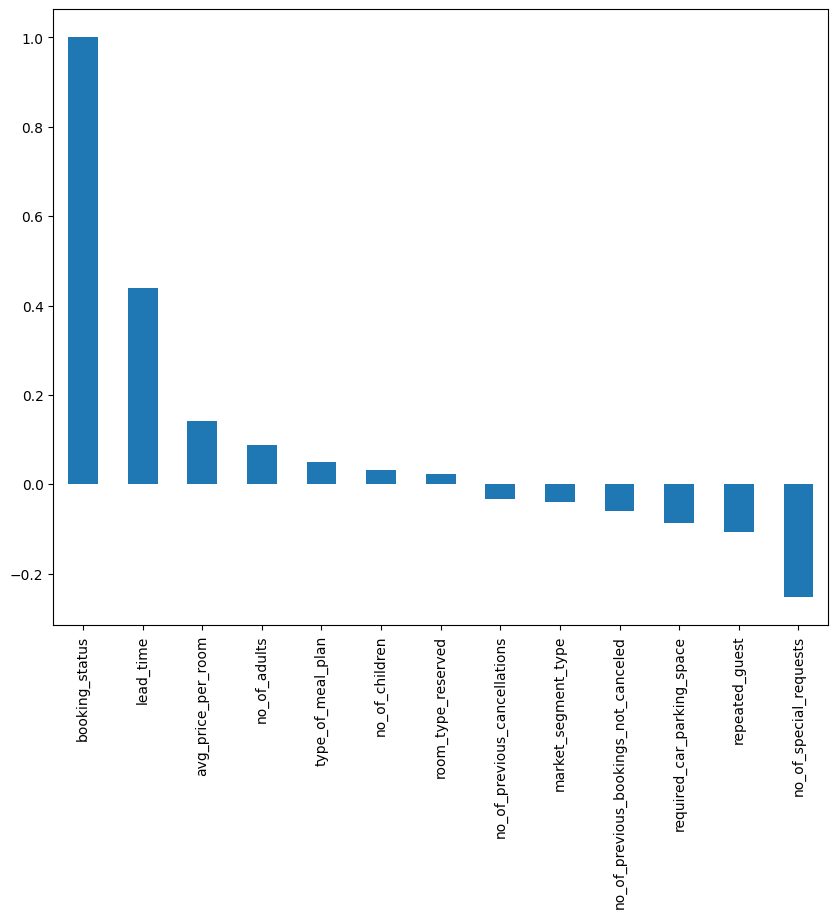

In [39]:
# Include 'booking_status' in the correlation calculation
target_corr = df.corr()['booking_status'].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(10, 8))
target_corr.plot(kind='bar')
plt.show()

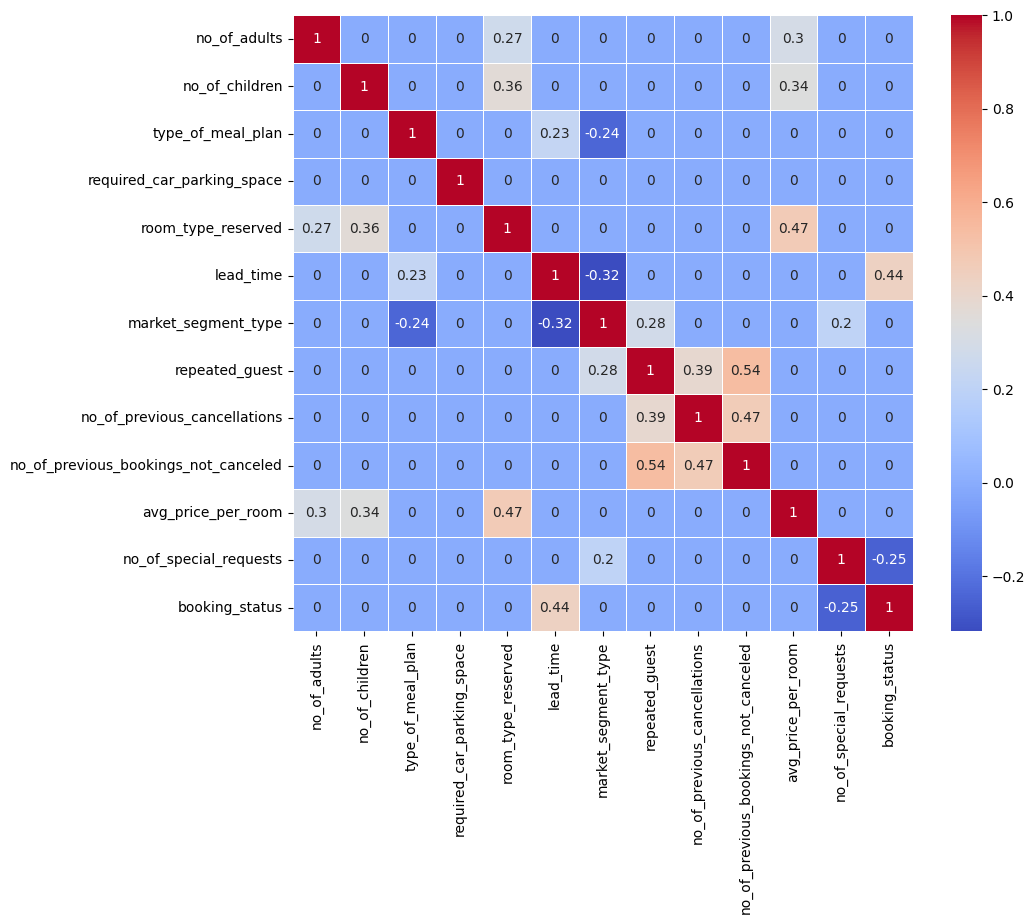

In [40]:
corr = df.corr()
high_corr = corr[abs(corr) > 0.2].fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, cmap='coolwarm', annot=True, linewidths=.5)
plt.show()

## Data Preprocessing Overview 
To ready the data for machine learning, features were transformed into numerical representations.**Robust scaling, employing the Interquartile Range (IQR) method**, effectively managed outliers in 'lead_time' and 'sales.'

Before applying the Synthetic Minority Over-sampling Technique (SMOTE), the dataset exhibited an imbalance: 24,390 instances of 'not canceled' and 11,885 instances of 'canceled.' This refined dataset, with 13 columns and 36,275 rows, establishes the foundation for subsequent model training and analysis.

The dataset was split into a training set (75%) and a test set (25%) for model evaluation.

In [41]:
df.head()

,no_of_adults,no_of_children,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,0,1,224,0,0,0,0,65.00,0,0
1,2,0,0,0,1,5,1,0,0,0,106.68,1,0
2,1,0,1,0,1,1,1,0,0,0,60.00,0,1
3,2,0,1,0,1,211,1,0,0,0,100.00,0,1
4,2,0,0,0,1,48,1,0,0,0,94.50,0,1


In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('booking_status', axis=1)   # Features
y = df['booking_status']                # Target variables

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42, stratify=y)

In [44]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

## Model Optimization 

The models will be trained on the resampled training data, which incorporated the Synthetic Minority Over-sampling Technique (SMOTE) to address the class imbalance. The optimized models include:

**Logistic Regression**: A linear model used for binary classification tasks, estimating the probability of a binary outcome.

**Random Forest Classification**: An ensemble of decision trees that combines their predictions to improve accuracy and reduce overfitting.

**Decision Tree Classification**: A tree-like model that makes decisions based on feature values to classify or predict outcomes.

**K-Nearest Neighbors (KNN)**: A simple algorithm that classifies data points based on the majority class of their nearest neighbors in the feature space.

These optimized models collectively form the foundation of our predictive framework, providing improved accuracy and robustness. More details are available in the report.

We will begin by employing grid search to identify the optimal hyperparameters for each model.

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter distributions for Random Forest
param_dist_random_forest = {
    'n_estimators': [50, 150],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'bootstrap': [True, False]
}

# Instantiate Random Forest model
random_forest_model = RandomForestClassifier()

# Perform randomized search
random_search_random_forest = RandomizedSearchCV(random_forest_model, param_distributions=param_dist_random_forest, n_iter=10, cv=5)
random_search_random_forest.fit(X_train, y_train)

# Retrieve best parameters
best_params_random_forest = random_search_random_forest.best_params_
print("Best parameters for Random Forest:", best_params_random_forest)


Best parameters for Random Forest: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': True}


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for Decision Tree
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}

# Instantiate Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Perform grid search
grid_search_decision_tree = GridSearchCV(decision_tree_model, param_grid_decision_tree, cv=5, verbose=False)
grid_search_decision_tree.fit(X_train, y_train)

# Retrieve best parameters
best_params_decision_tree = grid_search_decision_tree.best_params_
print("Best parameters for Decision Tree:", best_params_decision_tree)


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression
param_grid_logistic_regression = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2']  # Only l2 penalty is supported by solver='lbfgs'
}

# Instantiate Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000, solver='lbfgs')  # Specify solver='lbfgs'

# Perform grid search
grid_search_logistic_regression = GridSearchCV(logistic_regression_model, param_grid_logistic_regression, cv=5)
grid_search_logistic_regression.fit(X_train, y_train)

# Retrieve best parameters
best_params_logistic_regression = grid_search_logistic_regression.best_params_
print("Best parameters for Logistic Regression:", best_params_logistic_regression)


Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting method for neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm for nearest neighbors search
    'p': [1, 2]  # Power parameter for Minkowski distance metric
}

# Instantiate KNN model
knn_model = KNeighborsClassifier()

# Perform grid search
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

# Retrieve best parameters
best_params_knn = grid_search_knn.best_params_
print("Best parameters for KNN:", best_params_knn)


Best parameters for KNN: {'algorithm': 'brute', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

# Define models with best parameters
rf_model = RandomForestClassifier(bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150)
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2, splitter='best')
logistic_model = LogisticRegression(C=1, penalty='l2')
knn_model = KNeighborsClassifier(algorithm='brute', n_neighbors=7, p=1, weights='distance')  # KNN with best parameters

# Train models
rf_model.fit(X_resampled, y_resampled)
dt_model.fit(X_resampled, y_resampled)
logistic_model.fit(X_resampled, y_resampled)
knn_model.fit(X_resampled, y_resampled)

# Evaluate models on the test set
rf_predictions = rf_model.predict(X_test_scaled)
dt_predictions = dt_model.predict(X_test_scaled)
logistic_predictions = logistic_model.predict(X_test_scaled)
knn_predictions = knn_model.predict(X_test_scaled)

# Generate classification reports
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
dt_report = classification_report(y_test, dt_predictions, output_dict=True)
logistic_report = classification_report(y_test, logistic_predictions, output_dict=True)
knn_report = classification_report(y_test, knn_predictions, output_dict=True)

### Model Performance Summary

In [60]:
# Extract metrics from classification reports
rf_metrics = [rf_report['weighted avg']['f1-score'], rf_report['weighted avg']['recall'], rf_report['accuracy'], rf_report['weighted avg']['precision']]
dt_metrics = [dt_report['weighted avg']['f1-score'], dt_report['weighted avg']['recall'], dt_report['accuracy'], dt_report['weighted avg']['precision']]
logistic_metrics = [logistic_report['weighted avg']['f1-score'], logistic_report['weighted avg']['recall'], logistic_report['accuracy'], logistic_report['weighted avg']['precision']]
knn_metrics = [knn_report['weighted avg']['f1-score'], knn_report['weighted avg']['recall'], knn_report['accuracy'], knn_report['weighted avg']['precision']]

# Create a DataFrame to store evaluation metrics
evaluation_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN'],
    'F1 Score': [rf_metrics[0], dt_metrics[0], logistic_metrics[0], knn_metrics[0]],
    'Recall': [rf_metrics[1], dt_metrics[1], logistic_metrics[1], knn_metrics[1]],
    'Accuracy': [rf_metrics[2], dt_metrics[2], logistic_metrics[2], knn_metrics[2]],
    'Precision': [rf_metrics[3], dt_metrics[3], logistic_metrics[3], knn_metrics[3]]
})

evaluation_df

,Model,F1 Score,Recall,Accuracy,Precision
0,Random Forest,0.873902,0.873525,0.873525,0.874394
1,Decision Tree,0.846997,0.845297,0.845297,0.850466
2,Logistic Regression,0.774856,0.770537,0.770537,0.784924
3,KNN,0.859323,0.858419,0.858419,0.860782


### Precision-Recall Curves

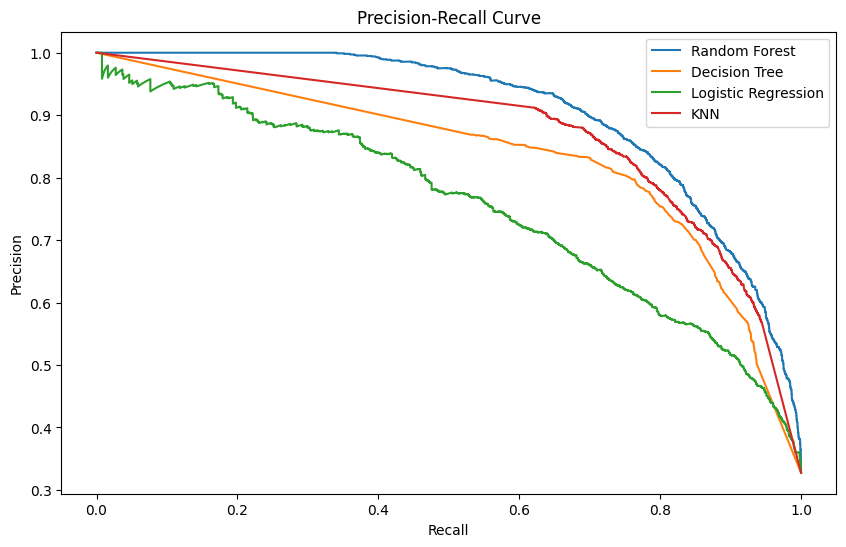

In [61]:
# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))

# Plot Precision-Recall Curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(recall_rf, precision_rf, label='Random Forest')

# Plot Precision-Recall Curve for Decision Tree
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(recall_dt, precision_dt, label='Decision Tree')

# Plot Precision-Recall Curve for Logistic Regression
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(recall_logistic, precision_logistic, label='Logistic Regression')

# Plot Precision-Recall Curve for KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(recall_knn, precision_knn, label='KNN')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

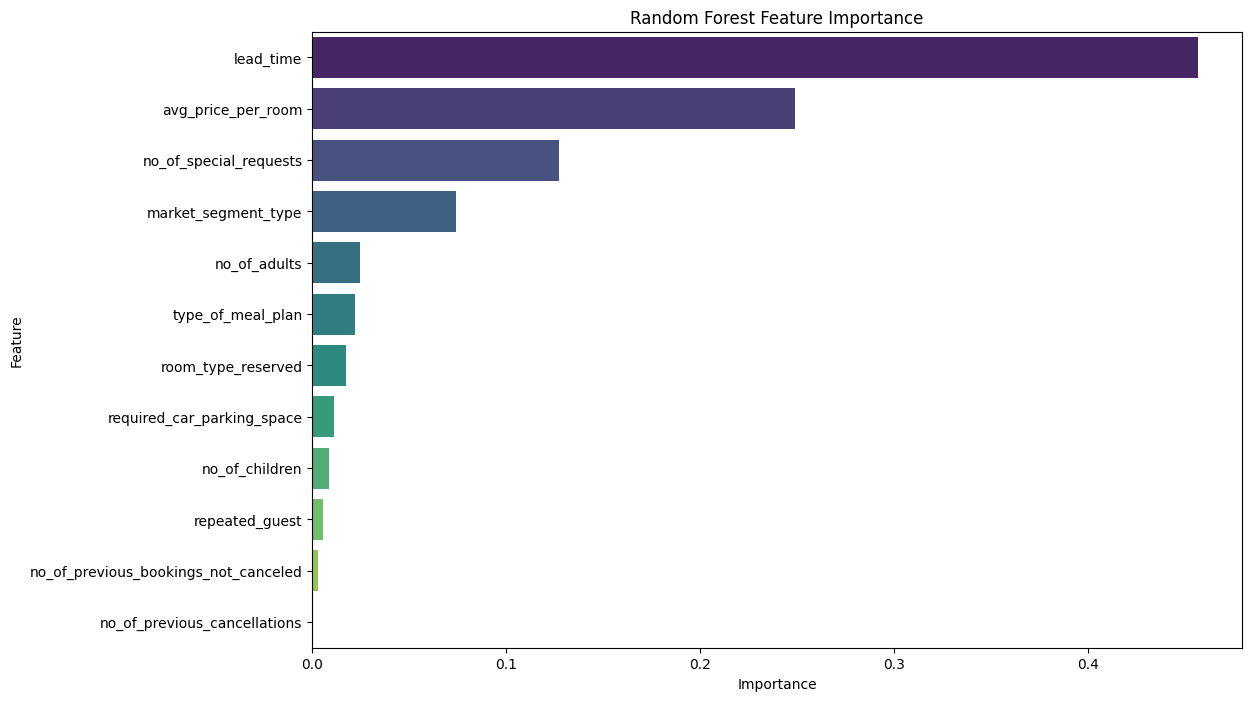

In [62]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': ['no_of_adults', 'no_of_children', 'type_of_meal_plan', 'required_car_parking_space',
                                                  'room_type_reserved', 'lead_time', 'market_segment_type', 'repeated_guest',
                                                  'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                                                  'avg_price_per_room', 'no_of_special_requests'],
                                       'Importance': feature_importances})

# Sort features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

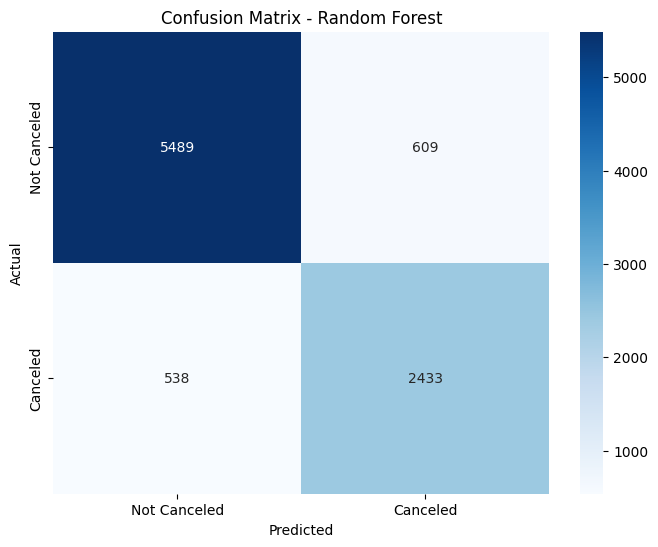

In [63]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

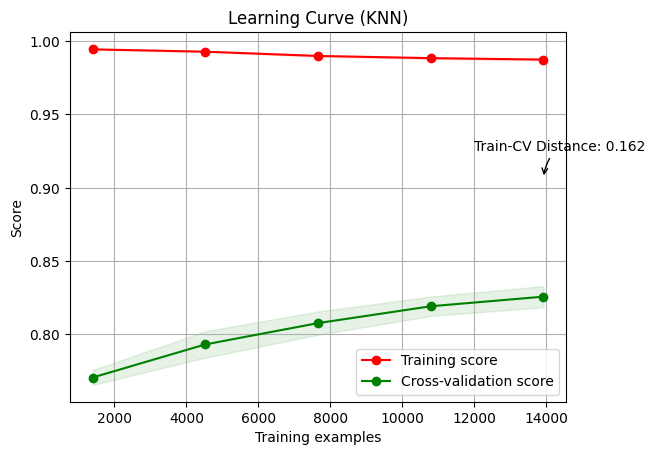

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN model with best parameters
best_knn_model = KNeighborsClassifier(algorithm='brute', n_neighbors=7, p=1, weights='distance')

# Define function to plot learning curve with distance annotation
def plot_learning_curve_with_distance(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - np.std(train_scores, axis=1),
                     train_scores_mean + np.std(train_scores, axis=1), alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - np.std(test_scores, axis=1),
                     test_scores_mean + np.std(test_scores, axis=1), alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

    # Calculate distance between last points of training and cross-validation curves
    train_cv_distance = train_scores_mean[-1] - test_scores_mean[-1]

    # Annotate distance on the plot
    plt.annotate(f"Train-CV Distance: {train_cv_distance:.3f}", xy=(train_sizes[-1], (train_scores_mean[-1] + test_scores_mean[-1]) / 2), xytext=(-50, 20), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

    return plt

# Plot learning curve with distance annotation
plot_learning_curve_with_distance(best_knn_model, "Learning Curve (KNN)", X_train, y_train, cv=5)
plt.show()


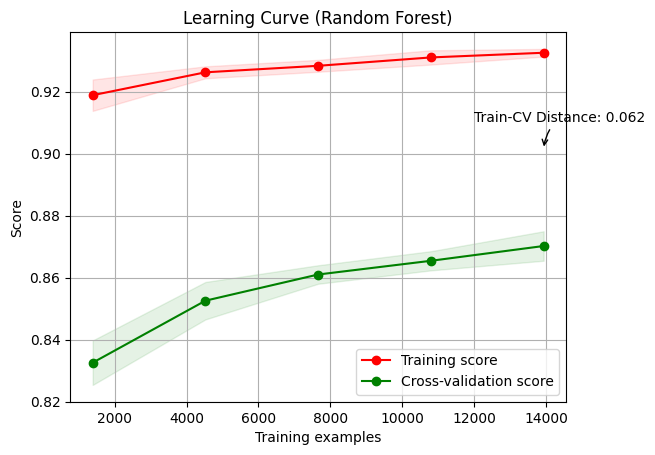

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest model with best parameters
best_rf_model = RandomForestClassifier(n_estimators=150, min_samples_split=10, min_samples_leaf=1, bootstrap=True)

# Define function to plot learning curve with distance annotation
def plot_learning_curve_with_distance(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - np.std(train_scores, axis=1),
                     train_scores_mean + np.std(train_scores, axis=1), alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - np.std(test_scores, axis=1),
                     test_scores_mean + np.std(test_scores, axis=1), alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

    # Calculate distance between last points of training and cross-validation curves
    train_cv_distance = train_scores_mean[-1] - test_scores_mean[-1]

    # Annotate distance on the plot
    plt.annotate(f"Train-CV Distance: {train_cv_distance:.3f}", xy=(train_sizes[-1], (train_scores_mean[-1] + test_scores_mean[-1]) / 2), xytext=(-50, 20), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

    return plt

# Plot learning curve with distance annotation
plot_learning_curve_with_distance(best_rf_model, "Learning Curve (Random Forest)", X_train, y_train, cv=5)
plt.show()


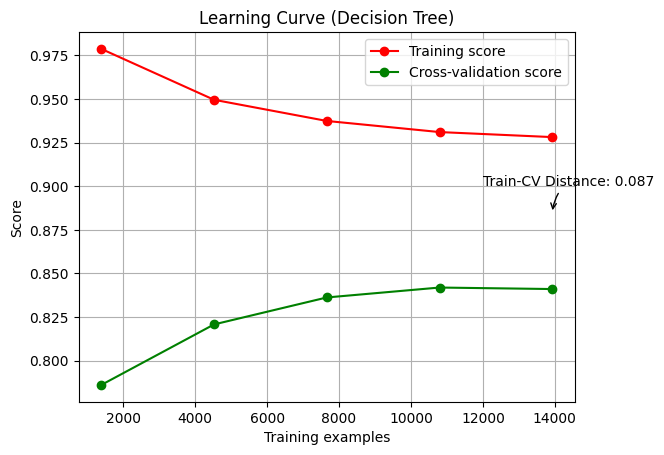

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# Instantiate Decision Tree model with best parameters
best_decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2, splitter='best')

# Define function to plot learning curve with distance annotation
def plot_learning_curve_with_distance(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    # Calculate distance between last points of training and cross-validation curves
    train_cv_distance = train_scores_mean[-1] - test_scores_mean[-1]

    # Annotate distance on the plot
    plt.annotate(f"Train-CV Distance: {train_cv_distance:.3f}", xy=(train_sizes[-1], (train_scores_mean[-1] + test_scores_mean[-1]) / 2), xytext=(-50, 20), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

    return plt

# Plot learning curve with distance annotation
plot_learning_curve_with_distance(best_decision_tree_model, "Learning Curve (Decision Tree)", X_train, y_train, cv=5)
plt.show()
